In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer
from sklearn.decomposition import PCA
from varname import nameof
import scipy.stats as stats

# Load Data 

In [ ]:
df=pd.read_csv("data.csv",index_col=0)
submission = pd.read_csv("sample_submission.csv",index_col=0)

# Check Data

### shape, describe, info

In [ ]:
df.shape


In [ ]:
df.describe()

In [ ]:
df.info()

### Missing value

In [ ]:
count_ms = df.sum()[df.isnull().sum()!=0].shape[0]
count_ms

### Duplicated value

In [ ]:
count_dp = df[df.duplicated()].shape[0]
count_dp

### histogram

In [ ]:
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i, column in enumerate(columns):
    sns.histplot(data=df[column], ax=axes[i//nc,i%nc])
plt.savefig("./png/data_histogram.png")

### Box plot

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(df)
plt.show("./png/data_boxplot.png")

# Data Preprocessing

 - 기준을 설정하고 그 기준내에서 각 데이터들을 평가하기 때문에 비교가 편하다
 -  각 특성들의 단위를 무시하고 값으로 단순 비교

## Saclers
- MinMaxScaler
- RobustScaler
- StandardScaler
- MaxAbsScaler
- PowerTransformer

In [ ]:
mm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()
ss_scaler = StandardScaler()
ma_scaler = MaxAbsScaler()
po_transformer = PowerTransformer()

In [ ]:
mm_data=mm_scaler.fit_transform(df)
rb_data=rb_scaler.fit_transform(df)
ss_data=ss_scaler.fit_transform(df)
ma_data=ma_scaler.fit_transform(df)
po_data=po_transformer.fit_transform(df)


In [ ]:
mm_data.shape

#### MinMax scaler

In [ ]:
# MinMax Scaler

t_df=mm_data
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i in range(t_df.shape[1]):
    sns.histplot(data=t_df[:,i], ax=axes[i//nc,i%nc])
plt.savefig("./png/mm_data_histogram.png")

#### Robust Scaler

In [ ]:
# Robust Scaler

t_df=rb_data
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i in range(t_df.shape[1]):
    sns.histplot(data=t_df[:,i], ax=axes[i//nc,i%nc])
plt.savefig("./png/rb_data_histogram.png")

#### Standard Scaler

In [ ]:
# Standard Scaler

t_df=ss_data
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i in range(t_df.shape[1]):
    sns.histplot(data=t_df[:,i], ax=axes[i//nc,i%nc])
plt.savefig("./png/ss_data_histogram.png")

#### MaxAbs Scaler

In [ ]:
# MaxAbs Scaler

t_df=ma_data
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i in range(t_df.shape[1]):
    sns.histplot(data=t_df[:,i], ax=axes[i//nc,i%nc])
plt.savefig("./png/ma_data_histogram.png")

#### Power Transform

In [ ]:
# Power Transform

t_df=po_data
columns=df.columns
nr,nc=6,5
# create subplots
fig, axes = plt.subplots(nr,nc,figsize=(30,20),sharex=True)

# insert data into plot
for i in range(t_df.shape[1]):
    sns.histplot(data=t_df[:,i], ax=axes[i//nc,i%nc])
plt.savefig("./png/po_data_histogram.png")

## Normality Test

# Data Correlation

In [ ]:
# heatmap
c_df = df.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/data_correlation.png")

In [ ]:
# heatmap
c_df = pd.DataFrame(po_data).corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/po_data_correlation.png")

In [ ]:
# heatmap
c_df = pd.DataFrame(ma_data).corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/ma_data_correlation.png")

In [ ]:
# heatmap
c_df = pd.DataFrame(ss_data).corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/ss_data_correlation.png")

In [ ]:
# heatmap
c_df = pd.DataFrame(mm_data).corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/mm_data_correlation.png")

In [ ]:
# heatmap
c_df = pd.DataFrame(rb_data).corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(c_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(c_df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/rb_data_correlation.png")

In [ ]:
fig = plt. figure(figsize= (20,5))
ax1 = fig.add_subplot (1, 2, 1)
ax2 = fig.add_subplot (1, 2, 2)
stats.probplot (rand2, dist=stats.norm, plot=ax1)
mu = rand2.mean ()
variance = rand2. var ()
sigma = variance ** 0.5
× = np. linspace (mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')
sns.distplot (ax=ax2, a=rand2, bins=100, color="red", label='observed') ax2.legend ()
plt.show ()

# Dimensionality Reduction

### 1. Select features

In [ ]:
selected_columns = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13','f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
selected_data = df[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_data_correlation.png")

In [ ]:
selected_columns = [7,8,9,10,11,12,13,22,24,25,26,27,28]
len(selected_columns)

In [ ]:
selected_data = pd.DataFrame(mm_data)[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_mm_data_correlation.png")

In [ ]:
selected_data = pd.DataFrame(rb_data)[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_rb_data_correlation.png")

In [ ]:
selected_data = pd.DataFrame(ss_data)[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_ss_data_correlation.png")

/var/folders/0x/3xk_qp_x2xz488l5f9h_cmx00000gn/T/ipykernel_50366/3069582496.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


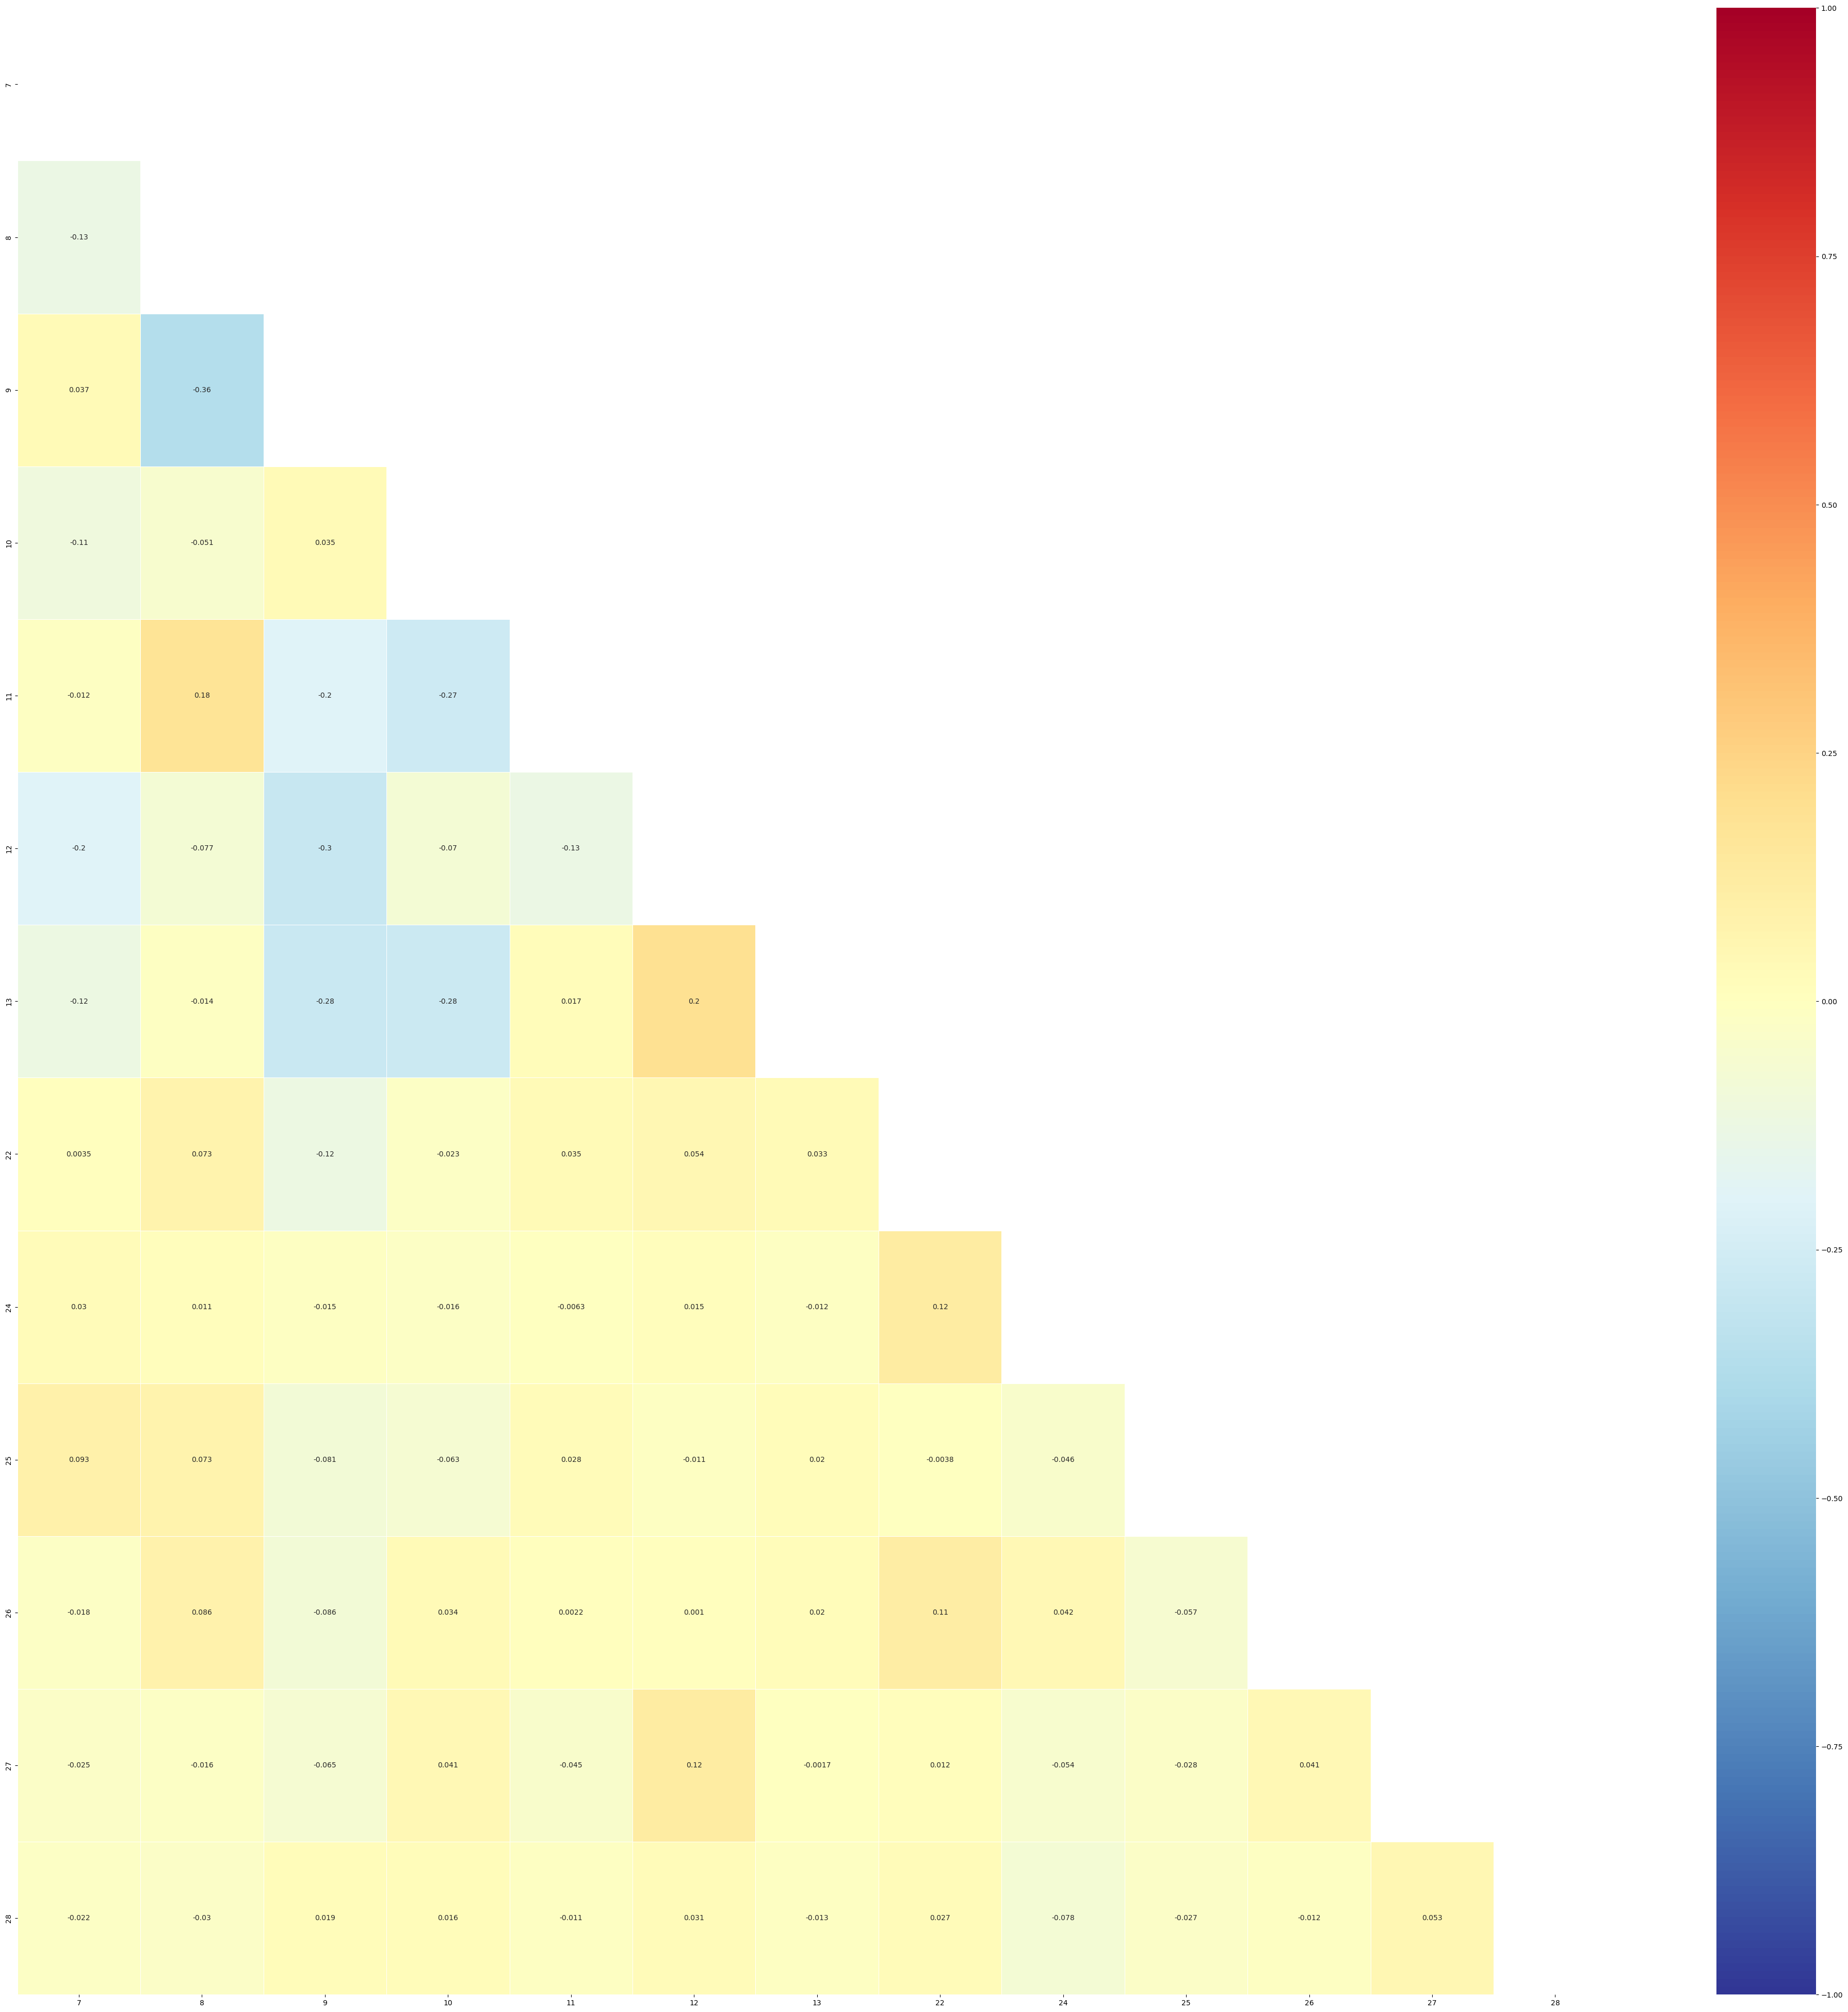

In [98]:
selected_data = pd.DataFrame(ma_data)[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_ma_data_correlation.png")

In [ ]:
selected_data = pd.DataFrame(po_data)[selected_columns]
corr_mat = selected_data.corr()
fig, ax = plt.subplots( figsize=(50,50) )

# masking upper side of triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, 
            cmap = 'RdYlBu_r', 
            annot = True,
            mask=mask,
            linewidths=.5,
            vmin = -1,vmax = 1)  
            
plt.savefig("./png/selected_po_data_correlation.png")

### 2. Extract Features

#### 2-1. PCA

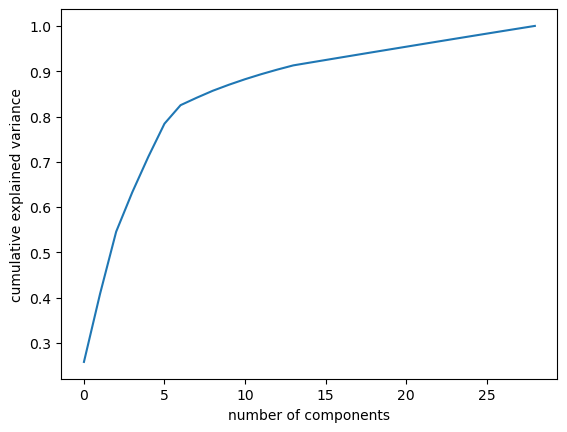

In [95]:
# data
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig("./png/pca_curve/pca_curve_data.png")

In [102]:
nameof(ma_data)

'ma_data'

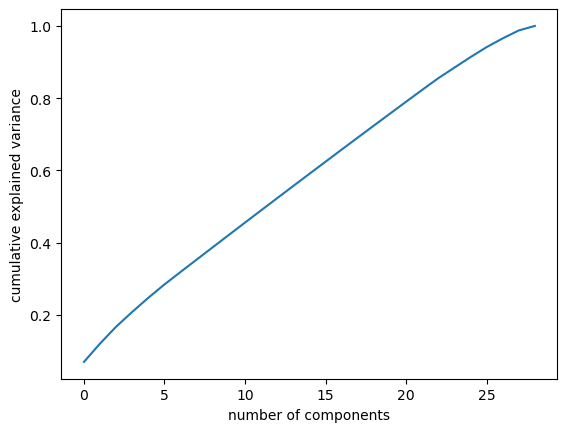

In [106]:
# po_selected
pca = PCA().fit(rb_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig("./png/pca_curve/selected/pca_curve_%s.png"%(nameof(rb_data)))

### 2-2 TSNE

# Data Preprocessing
    - Scaling
    - Demensionality reduction

    - Test
        - Shapiro-Wilk Test
        - Poisson Dispersion Test
# Clustering Methods
     - k-Means
     - Mean Shift
     - DBSCAN
     - Gaussian Mixture Models
     - Agglomerative Hierarchical Clustering
# Select number of cluster
    - Elbow Method 
# Estimator
    - Dunn Index
    - Shiloutate score
    - Rand Index?
    - Adjusted Rand Index